## 01 - Quotes and Trades


Take a peak at the quotes and trades data from the bitmexOrderBook service.

### Data Import

In [230]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
# Connect to mongodb database
mongoClient = pymongo.MongoClient("mongodb://localhost:27017/")
db = mongoClient.bitmexOrderBook

# Create references to collections
quotesCollection = db.quotes
tradesCollection = db.trades

### Quotes

Bids and Asks over time. Bids are current price to buy. Asks are current price to sell.

Quotes are stored in the mongodb database built using the bitmexOrderBook service.
A quote has the following structure in JSON:

{_id,
timestamp,
bidPrice,
bidSize,
askPrice,
askSize,
spread
}




In [232]:
quotesAll = list(quotesCollection.find({}))

In [233]:
quotesDF = pd.DataFrame.from_records(quotesAll)

In [234]:
print(quotesDF.describe())

          timestamp      bidPrice       bidSize      askPrice       askSize  \
count  8.843300e+04  88433.000000  8.843300e+04  88433.000000  8.843300e+04   
mean   1.578861e+09   8134.997297  1.099605e+06   8135.500616  1.205143e+06   
std    1.354318e+03      6.008224  9.353824e+05      6.008734  8.743174e+05   
min    1.578859e+09   8120.500000  1.000000e+00   8121.000000  1.100000e+01   
25%    1.578859e+09   8131.500000  4.224860e+05   8132.000000  4.745520e+05   
50%    1.578861e+09   8136.500000  9.406240e+05   8137.000000  1.165256e+06   
75%    1.578862e+09   8139.500000  1.639216e+06   8140.000000  1.820247e+06   
max    1.578863e+09   8145.500000  1.109076e+07   8146.000000  5.643905e+06   

             spread  
count  88433.000000  
mean       0.503319  
std        0.065576  
min        0.500000  
25%        0.500000  
50%        0.500000  
75%        0.500000  
max        3.500000  


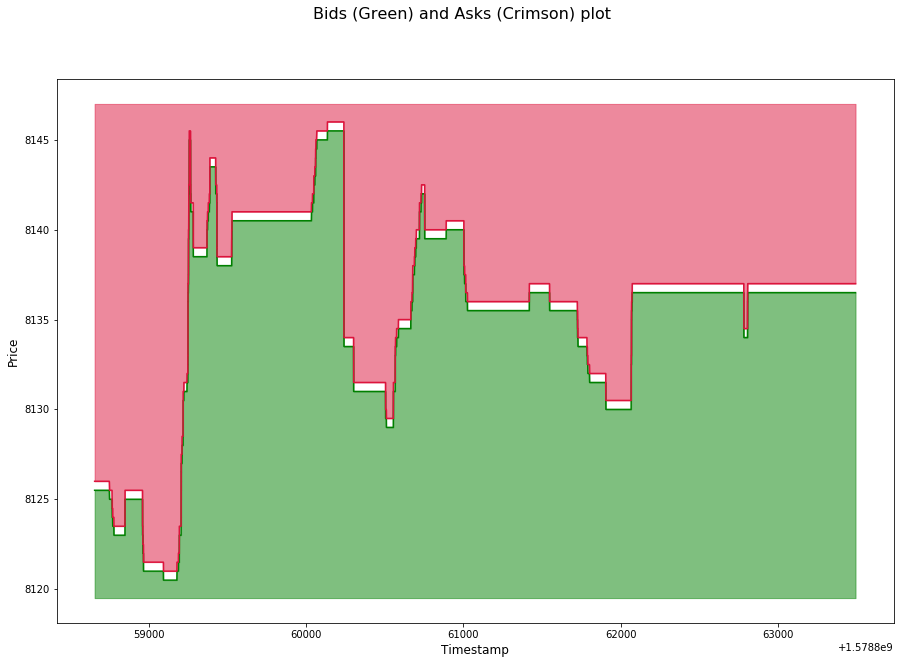

In [235]:
fig = plt.figure()
ax = plt.axes()

fig.suptitle('Bids (Green) and Asks (Crimson) plot', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='green')
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='crimson')

plt.fill_between(quotesDF.timestamp,  quotesDF.bidPrice, min( quotesDF.bidPrice)-1, color='green', alpha=0.5)
plt.fill_between(quotesDF.timestamp, max(quotesDF.askPrice)+1, quotesDF.askPrice, color='crimson', alpha=0.5)

plt.show()

### Spread

This describes the price difference between the ask and bid price. 

In [219]:
quotesDF["spread"] = quotesDF.askPrice - quotesDF.bidPrice

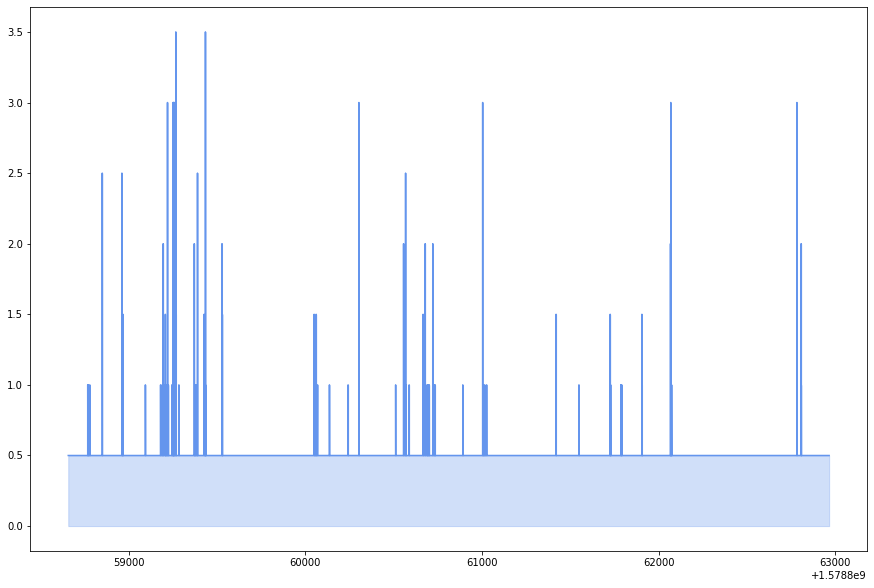

In [220]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.spread, color='cornflowerblue')

plt.fill_between(quotesDF.timestamp, 0, quotesDF.spread, color='cornflowerblue', alpha=0.3)

plt.show()

### Quote Size Imbalance

The difference in size between the ask and bid.

In [221]:
quotesDF['imbalance'] = quotesDF.askSize - quotesDF.bidSize

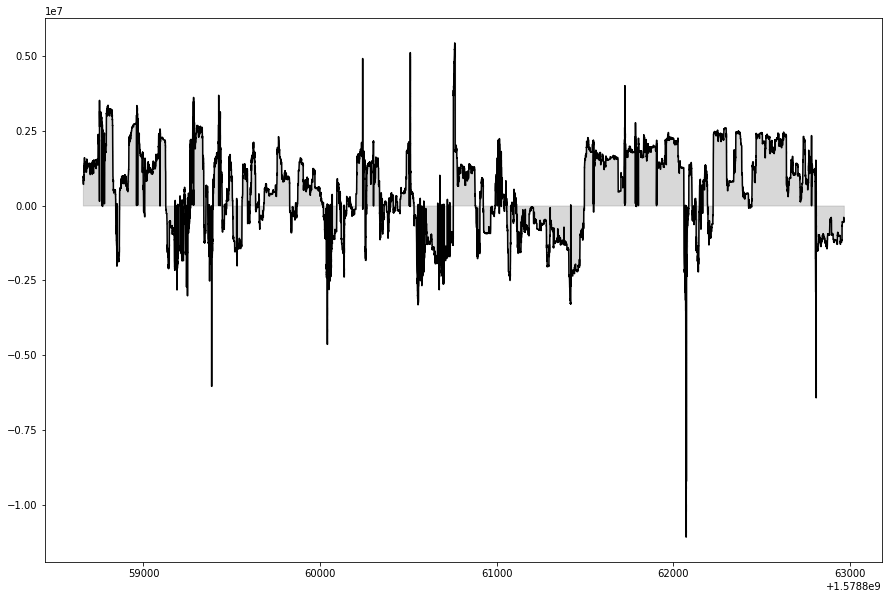

In [222]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.imbalance, color='black')
plt.fill_between(quotesDF.timestamp, 0, quotesDF.imbalance, color='gray', alpha=0.3)
plt.show()

### Trades

Here we plot the buy and sell trades at the given price and time, and the size of the trades.

In [236]:
tradesAll = list(tradesCollection.find({}))

In [224]:
tradesDF = pd.DataFrame.from_records(tradesAll)

In [225]:
print(tradesDF.describe())

                        _id     timestamp  side   price  size
0  5e1b78a22afcd846244478e9  1.578859e+09  Sell  8125.5  1281
1  5e1b78a62afcd84624447c5b  1.578859e+09   Buy  8126.0   200
2  5e1b78a72afcd84624447cec  1.578859e+09  Sell  8125.5   666
3  5e1b78a72afcd84624447d5d  1.578859e+09  Sell  8125.5  2000
4  5e1b78a82afcd84624447def  1.578859e+09  Sell  8125.5   256


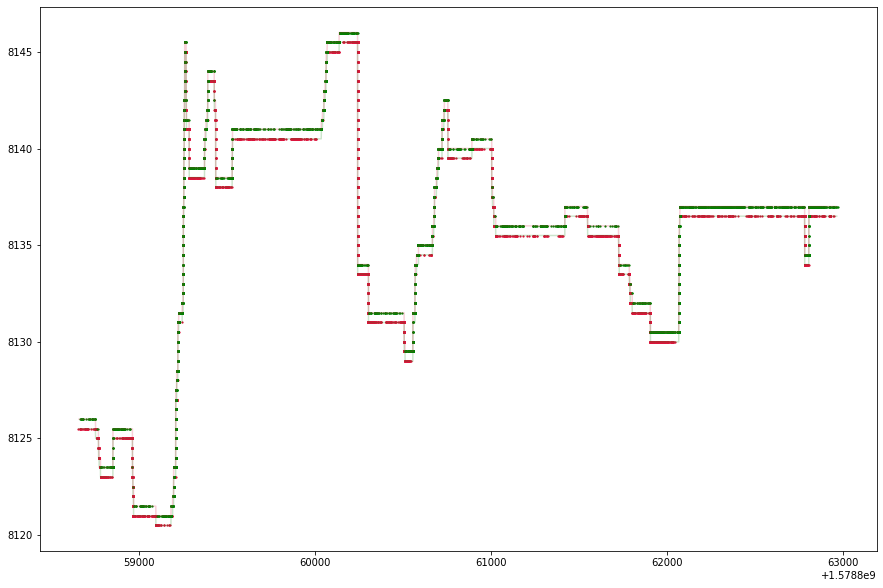

In [226]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='green', alpha=0.2)
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='crimson', alpha=0.2)

sellTrades = tradesDF[tradesDF['side'] == "Sell"]
buyTrades = tradesDF[tradesDF['side'] == "Buy"]

plt.scatter(sellTrades.timestamp, sellTrades.price, s=1.5, alpha=1, c='crimson')
plt.scatter(buyTrades.timestamp, buyTrades.price, s=1.5, alpha=1, c='green')

plt.show()

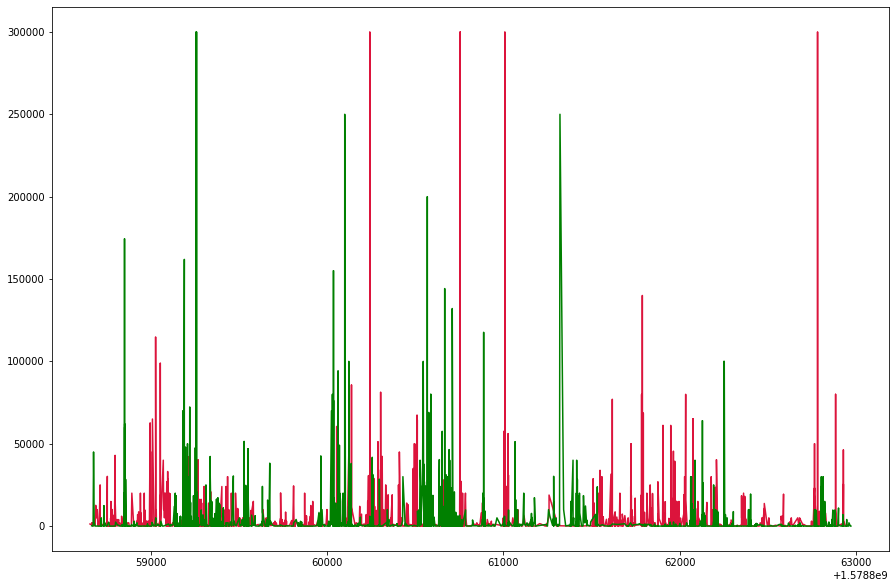

In [228]:
fig = plt.figure()
ax = plt.axes()

#plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='gray', alpha=0.2)
#plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='gray', alpha=0.2)

plt.plot(sellTrades.timestamp, sellTrades['size'], c='crimson')
plt.plot(buyTrades.timestamp, buyTrades['size'], c='green')

plt.show()